# Table of Contents

1. Import Libraries


2. Data Cleaning
    - 2.1 Load the data
    - 2.2 Check for null values and modify the dataset


3. Exploratory Data Analysis 

# 1.  Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 2.  Data Cleaning

## 2.1 Load the data

In [2]:
# Load data

df = pd.read_csv('data/Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [3]:
df.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [4]:
# Load column descriptions

documentation = pd.read_csv('data/Debernardi et al 2020 documentation.csv')
documentation

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


## 2.2 Check for null values and modify the dataset

From the description of the columns above, the following heatmap gives us important information on how to deal with the null values:

- The purpose of this project is to use the urinary levels of certain biomarkers to detect presence of PDAC. This means we are not concerned (for now) with the stage of cancer or the type of benign disease.
    - *Create a new output variable called 'has_cancer'* with values 0 (no) and 1 (yes) using information from the columns 'diagnosis', 'stage', and 'benign_sample_diagnosis'


- The column 'plasma_CA19_9' indicates  blood plasma levels of a protein, and was only collected for some of the patients.
    - *Drop 'plasma_CA19_9'* since we are only interested in urine  biomarkers
    
    
- The column 'REG1A' was only collected in 306 of the 590 patients
    - *Drop 'REG1A'* for  now. This may be  revisited later for more domain specific analysis
    
    
- The  columns 'sample_id', 'patient_cohort', and 'sample_origin' do not give enough information without more context
    - *Drop these columns*
    
    
- The column 'sample_origin' is also not meaningful under the assumption that the same sample collection procedure was used in all centers
    - *Drop sample_origin*
    
- Sample

<AxesSubplot:>

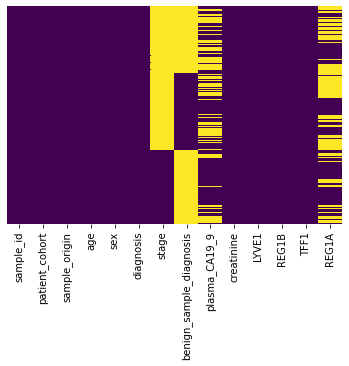

In [5]:
# Check for null values

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
# Read full details of columns with null values

documentation['Details'][8]

'Blood plasma levels of CA 19–9 monoclonal antibody that is often elevated in patients with pancreatic cancer. Only assessed in 350 patients (one goal of the study was to compare various CA 19-9 cutpoints from a blood sample to the model developed using urinary samples).'

In [7]:
documentation['Details'][13]

'Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)'

In [8]:
documentation['Details'][1]

'Cohort 1,  previously used samples; Cohort 2, newly added samples'

In [9]:
# Define function to clean data

def clean_data(data):
    '''
    Takes the full dataset as an argument and returns the cleaned dataset
    '''
    
    # Create output column 'has_disease'
    
    data['has_disease'] = [1 if x == 3 else 0 for x in data['diagnosis']]
        
    # Drop columns that aren't useful to the analysis
    
    columns_to_drop = ['sample_id',
                       'patient_cohort',
                       'sample_origin',
                       'diagnosis',
                       'stage',
                       'benign_sample_diagnosis',
                       'plasma_CA19_9',
                       'REG1A']
    
    data_cleaned = data.drop(columns_to_drop, axis=1)
        
    return data_cleaned

In [10]:
df = clean_data(df)

x = df.drop('has_disease',  axis=1)
y = df['has_disease']

# 3. Exploratory Data Analysis

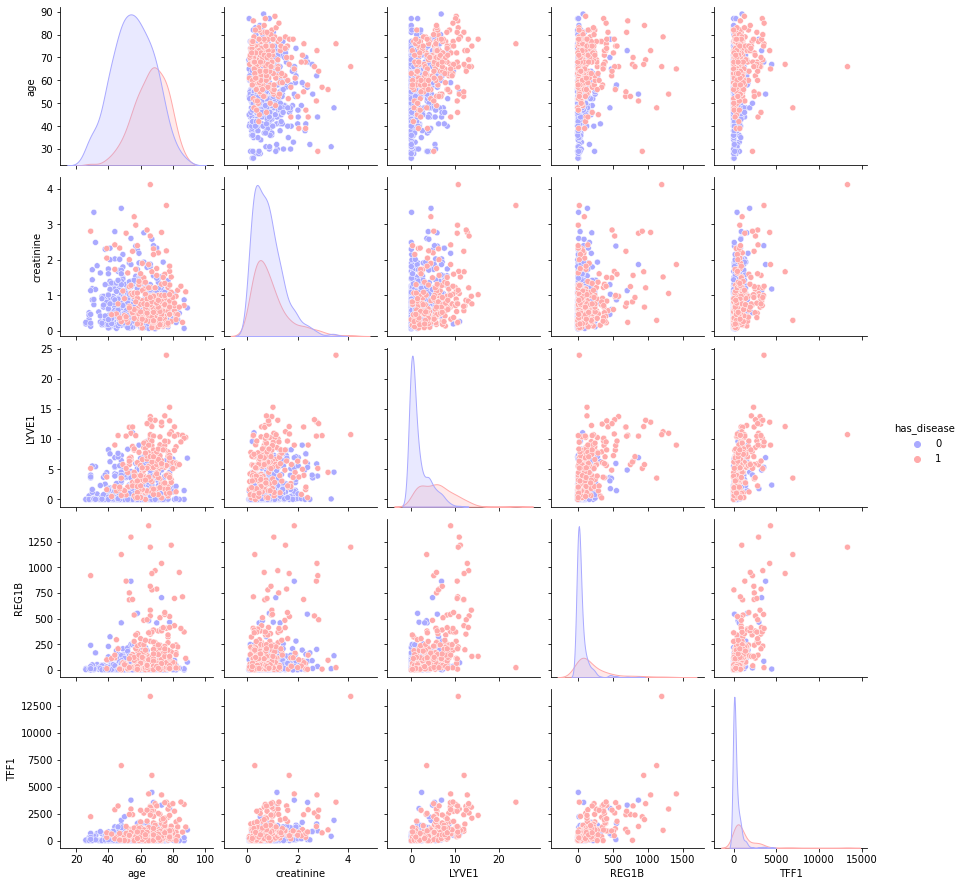

In [11]:
# Create basic plots to explore data

# Pair plot

sns.pairplot(df, hue='has_disease', palette='bwr')

Text(0.5, 1.0, 'Correlation Matrix: PDAC urine samples\n')

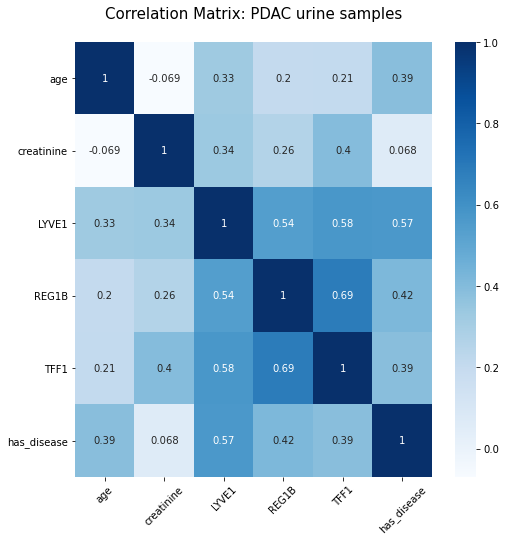

In [50]:
#  Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix: PDAC urine samples\n', fontsize=15)

Having cancer is strongly corelated to levels  of protein biomarkers but weakly correlated to creatinine levels. It is also possible that some of these biomarkers exist in the body together, since presence of some biomarkers is strongly correlated to each other. 